In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [22]:
gamma = 5.0/3.0
B0 = 1.0
rho0 = 1.0
sheat_thickness = 1.0
beta_upstream = 0.5 * 0.5
p0 = B0**2 / 2.0
x_max = 1.0 * sheat_thickness
y_max = 100.0 * sheat_thickness
dx = sheat_thickness / 10.0
dy = dx
nx = int(x_max / dx)
ny = int(2.0 * y_max / dy)
dt = 0.0
CFL = 0.7
x_coordinate = np.arange(0.0, x_max, dx)
y_coordinate = np.arange(-y_max, y_max, dy)
X, Y = np.meshgrid(x_coordinate, y_coordinate)

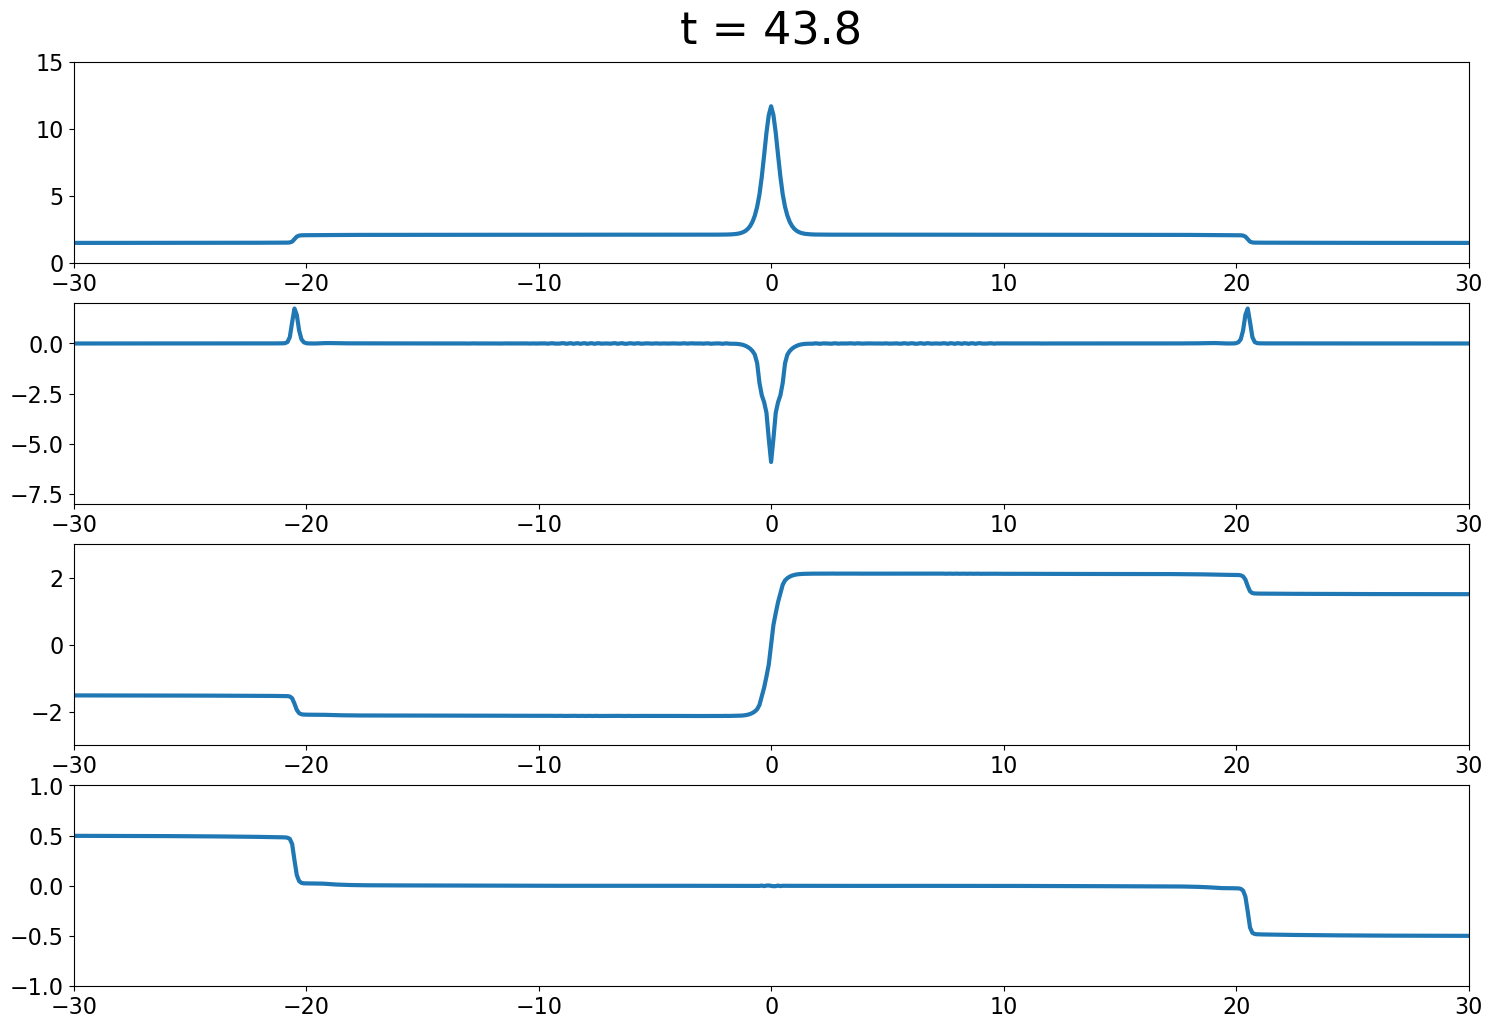

In [50]:
fig = plt.figure(figsize=(18, 12))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

log = np.loadtxt("results_current_sheet/log_current_sheet.txt", delimiter=',')
step = 2000
index = 5

U = np.loadtxt(f"results_current_sheet/current_sheet_{step}.txt", delimiter=',').reshape(8, nx, ny)
rho = U[0, :]
u = U[1, :] / rho
v = U[2, :] / rho
w = U[3, :] / rho
Bx = U[4, :]
By = U[5, :]
Bz = U[6, :]
e = U[7, :]
p = (gamma - 1.0) \
        * (e - 0.5 * rho * (u**2+v**2+w**2)
            - 0.5 * (Bx**2+By**2+Bz**2))
Ex = -(v * Bz - w * By)
Ey = -(w * Bx - u * Bz)
Ez = -(u * By - v * Bx)
current_x = np.zeros(Bx.shape)
current_y = -(np.roll(Bz, -1, axis=0) - np.roll(Bz, 1, axis=0)) / (2*dx)
current_z = (np.roll(By, -1, axis=0) - np.roll(By, 1, axis=0)) / (2*dx) \
          - (np.roll(Bx, -1, axis=1) - np.roll(Bx, 1, axis=1)) / (2*dy)
current_y[0] = current_y[1] 
current_y[-1] = current_y[-2] 
current_z[0] = current_z[1] 
current_z[-1] = current_z[-2] 

current0 = B0 / sheat_thickness
VA = B0 / np.sqrt(rho0)

ax1.plot(y_coordinate, rho[index] / rho0,           lw=3)
ax2.plot(y_coordinate, current_z[index] / current0, lw=3)
ax3.plot(y_coordinate, Bx[index] / B0,              lw=3)
ax4.plot(y_coordinate, v[index] / VA,               lw=3)

time = log[int(step/100)][1]
ax1.set_title(f"t = {time:.1f}", fontsize=32, x = 0.5, y=1.05)

ax1.set_xlim(-30, 30)
ax2.set_xlim(-30, 30)
ax3.set_xlim(-30, 30)
ax4.set_xlim(-30, 30)
ax1.set_ylim(0.0, 15.0)
ax2.set_ylim(-8.0, 2.0)
ax3.set_ylim(-3.0, 3.0)
ax4.set_ylim(-1.0, 1.0)
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax3.tick_params(labelsize=16)
ax4.tick_params(labelsize=16)

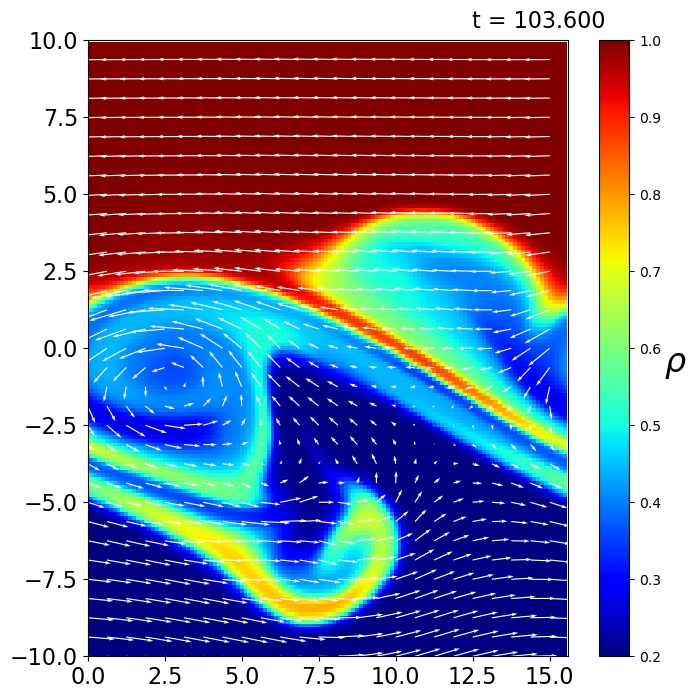

In [38]:
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

log = np.loadtxt("log_current_sheet.txt", delimiter=',')
total_steps = int(log[-1][0])
interval = 100
for step in range(0, total_steps+interval, interval):
    ax1.clear()

    U = np.loadtxt(f"results_current_sheet/current_sheet_{step}.txt", delimiter=',').reshape(8, nx, ny)
    rho = U[0, :, :]
    u = U[1, :, :] / rho 
    v = U[2, :, :] / rho 

    ax1.pcolormesh(X, Y, (rho).T, vmin=0.2, vmax=1.0, cmap='jet')
    
    ax1.text(0.8, 1.02, f"t = {log[int(step/100)][1]:.3f}", transform=ax1.transAxes, fontsize=16)
    ax1.tick_params(labelsize=16)
    ax1.set_xlim(0.0, x_max-dx)
    ax1.set_ylim(-y_max, y_max+1e-10)
    ax1.set_aspect('equal')

    fig.savefig(f"pictures/{step}.png", dpi=200)


filename = "KH_rr=0.2_rho.mp4"
img = cv2.imread(f'./pictures/0.png')
framesize = (img.shape[1], img.shape[0])
fps = 10.0
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video  = cv2.VideoWriter(filename=filename, fourcc=fourcc, fps=fps, frameSize=framesize)

for step in range(0, total_steps+interval, interval):
    img = cv2.imread(f'./pictures/{step}.png')
    video.write(img)
video.release()